<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales I-2018 </h1>

<H3 align='center'> Tarea 1 - Redes Neuronales y *Deep Learning* </H3>
<hr style="height:2px;border:none"/>

<h4 align='left'> Integrantes: </h4>
<p align='left'> Alfredo Silva Celpa 201373511-8 </p>
<p align='left'> Margarita Bugueño Pérez 201373510-k </p>
<hr style="height:2px;border:none"/>


**Temas**  
* Entrenamiento de redes *Feed-Forward* vı́a GD y variantes (SGD, mini-*batches*), *momentum*, regularización y tasa de aprendizaje adaptiva.
* Evaluación de redes *Feed-Forward* vı́a validación cruzada (cross-validation).
* Rol de capas ocultas y mayor profundidad (*Deep Learning*).
* Identificar el gradiente desvaneciente.
* Diseño y entrenamiento de Redes Convolucionales (CNNs).
 

** Formalidades **  
* Equipos de trabajo de: 2 personas (*cada uno debe estar en condiciones de realizar una presentación y discutir sobre cada punto del trabajo realizado*)
* Se debe preparar una presentación de 20 minutos. Presentador será elegido aleatoriamente.
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de entrega y discusión: 04 Abril
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea1-INF395-I-2018]

<hr style="height:2px;border:none"/>

La tarea se divide en secciones:

[1.](#primero) Predicción del precio de una Casa  
[2.](#segundo) *Deep Networks*  
[3.](#tercero) Convolutional Neural Network (CNN) en CIFAR.  
[4.](#cuarto) Aplicación de una red neuronal en Localización

<a id="primero"></a>
## 1. Predicción del precio de una Casa

En esta sección trabajaremos con un pequeño dataset conocido como **Boston Housing** que nos permitirá experimentar de modo más completo y exhaustivo con las técnicas bajo estudio. El problema consiste en predecir el precio de una casa en una zona/barrio de Boston (*USA*) a partir de una serie de atributos que describen el lugar que éste se ubica: tasa de criminalidad, proporción de zona residencial, proporción de zona industrial, si se encuentra junto al rı́o ó no, contaminación atmosférica medida como la concentración de óxidos nı́tricos en el aire, entre otros. Para ver en detalle la descripción de la semántica asociada a los atributos de este problema, puede consultar   __[Housing](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/)__.

> a) Construya un *dataframe* con los datos a analizar descargando los datos desde la URL mantenida por los autores de *The Elements of Statistical Learning*. Convierta la variable *CHAS* a un vector binario de dos componentes indicando las 2 posibilidades de su valor, indique la conveniencia de este paso. Describa brevemente el dataset utilizar.
```python
import pandas as pd
url = 'http://mldata.org/repository/data/download/csv/regression-datasets-housing/'
df = pd.read_csv(url, sep=',',header=None, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
    'RM', 'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
df = pd.get_dummies(df,columns=["CHAS"]) #to categorical
from sklearn.cross_validation import train_test_split
df_train,df_test= train_test_split(df,test_size=0.25, random_state=0)
df.shape
df.info()
df.describe()
```
<div class="alert alert-block alert-info">Es una buena práctica el normalizar los datos antes de trabajar con el modelo</div>
```python
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_train)
X_train_scaled = pd.DataFrame(scaler.transform(df_train),columns=df_train.columns)
y_train = df_train.pop('MEDV').reshape(-1,1)
```



El dataset a utilizar, tal como se mencionó, corresponde a **Boston Housing**. Éste se tomó de la librería StatLib mantenida por la Universidad Carnegie Mellon.  
El dataset fue creado por Harrison D., Rubinfeld D.L. y J. Environ el **7 de julio de 1993**.


Información de los atributos descritos en __[Boston Housing](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names)__.



    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000$
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's$

In [16]:
import pandas as pd
from sklearn.cross_validation import train_test_split

url = 'http://mldata.org/repository/data/download/csv/regression-datasets-housing/'
path='regression-datasets-housing.csv'
df = pd.read_csv(path, sep=',',header=None, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
    'RM', 'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
#CHAS, variable categorica
df = pd.get_dummies(df,columns=["CHAS"])
df_train,df_test= train_test_split(df,test_size=0.25, random_state=0)
df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CHAS_0,CHAS_1
0,0.00632,18,2.31,0.538,6.575,65.2,4.0900,1,296,15,396.90,4.98,24.0,1,0
1,0.02731,0,7.07,0.469,6.421,78.9,4.9671,2,242,17,396.90,9.14,21.6,1,0
2,0.02729,0,7.07,0.469,7.185,61.1,4.9671,2,242,17,392.83,4.03,34.7,1,0
3,0.03237,0,2.18,0.458,6.998,45.8,6.0622,3,222,18,394.63,2.94,33.4,1,0
4,0.06905,0,2.18,0.458,7.147,54.2,6.0622,3,222,18,396.90,5.33,36.2,1,0


In [17]:
print ("\nDimensiones del dataset:")
print (df.shape)
print ("\nDimensiones del dataframe de entrenamiento:")
print (df_train.shape)
print ("\nDimensiones del dataframe de pruebas:")
print (df_test.shape)
print ("\n\nInformación descritiva")
print (df.info())


Dimensiones del dataset:
(506, 15)

Dimensiones del dataframe de entrenamiento:
(379, 15)

Dimensiones del dataframe de pruebas:
(127, 15)


Información descritiva
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
CRIM       506 non-null float64
ZN         506 non-null int64
INDUS      506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null int64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
CHAS_0     506 non-null uint8
CHAS_1     506 non-null uint8
dtypes: float64(9), int64(4), uint8(2)
memory usage: 52.5 KB
None


El dataset completo, esta compuesto de 506 registros, cada uno descrito por 15 atributos. Del total de registros, 379 se utilizarán para la fase de entrenamiento mientras que los 127 restantes se utilizarán como dataset de prueba (testing set).  
Cabe destacar que en la descripción se enuncian sólo 14 debido a que uno de ellos, 'CHAS', corresponde a una variable binaria que toma valor 1 cuando la propiedad se encuentra en las cercanías/límites del río Charles y valor 0 en caso contrario. En base a esto entonces, era necesario redefinir tal variable como dos columnas (una para los casos positivos y otra para los casos negativos) puesto para fines matemáticos, durante la manipulación de los datos, la expresión original podría traducirse hacia una connotación positiva o negativa de la presencia de tal característica, elevando o disminuyendo el valor de la casa.  
Con el nuevo atributo se impide este razonamiento puesto que siempre se contará con un 1 en el registro 'CHAS', ya sea en la columna correspondiente a 'CHAS_0'(cercanía al río) o 'CHAS_1'(lejos del río).

De manera similar, contamos con la descripción de cada uno de los atributos; El tipo de dato, precisión, uso de memoria total, etc. Así determinamos que 9 de los 15 atributos son del tipo flotante y los 6 restantes de tipo entero (4 y 2 de diferente precisión).

In [18]:
print ("\n\nEstadísticos de interés; dataframe completo")
print (df.describe())

print ("\n\nEstadísticos de interés; dataframe de entrenamiento")
print (df_train.describe())



Estadísticos de interés; dataframe completo
             CRIM          ZN       INDUS         NOX          RM         AGE  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.347826   11.136779    0.554695    6.284634   68.574901   
std      8.601545   23.310593    6.860353    0.115878    0.702617   28.148861   
min      0.006320    0.000000    0.460000    0.385000    3.561000    2.900000   
25%      0.082045    0.000000    5.190000    0.449000    5.885500   45.025000   
50%      0.256510    0.000000    9.690000    0.538000    6.208500   77.500000   
75%      3.677082   12.000000   18.100000    0.624000    6.623500   94.075000   
max     88.976200  100.000000   27.740000    0.871000    8.780000  100.000000   

              DIS         RAD         TAX     PTRATIO           B       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.795043    9.549407  408.237154   18.083004  356.674

Igualmente, el método **.describe()** proporciona un resumen estadístico descriptivo que presenta tanto el valor medio, la dispersión, valores mínimos/máximos, así como la distribución de los datos diferida por cada atributo del dataframe.

Es posible notar entonces que ciertos atributos, como 'TAX' o 'B', presentan valores de dispersión muy altos. Así mismo, los valores medios de cada uno de los atributos varía considerablemente entre unos y otros debido al significado de cada uno. Es decir, es totalmente esperable (y natural) que la tasa de criminalidad se mueva en un dominio totalmente diferente al número de habitaciones promedio de una vivienda. Este fenómeno se aprecia tanto en el dataset completo como el conjunto de entrenamiento por lo que, nuevamente con el propósito de evitar el fenómeno de overfitting, es necesario reescalar los datos estandarizando las características, es decir, eliminando el promedio y escalando la varianza al valor unitario. Este trabajo lo hace **StandardScaler()**:

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_train)
X_train_scaled = pd.DataFrame(scaler.transform(df_train),columns=df_train.columns)
y_train = df_train.pop('MEDV').values.reshape(-1,1)

X_test_scaled =  pd.DataFrame(scaler.transform(df_test),columns=df_test.columns)
y_test = df_test.pop('MEDV').values.reshape(-1,1)

In [20]:
print (X_train_scaled.describe())

               CRIM            ZN         INDUS           NOX            RM  \
count  3.790000e+02  3.790000e+02  3.790000e+02  3.790000e+02  3.790000e+02   
mean   4.218262e-17  2.343479e-17  8.436523e-17  7.194480e-16 -7.733480e-16   
std    1.001322e+00  1.001322e+00  1.001322e+00  1.001322e+00  1.001322e+00   
min   -4.130329e-01 -4.985312e-01 -1.514998e+00 -1.475198e+00 -3.973687e+00   
25%   -4.046811e-01 -4.985312e-01 -8.618530e-01 -9.235945e-01 -5.894549e-01   
50%   -3.818337e-01 -4.985312e-01 -3.598727e-01 -1.565211e-01 -1.208466e-01   
75%   -1.827370e-03  3.430872e-01  1.000608e+00  6.450276e-01  5.246631e-01   
max    1.037470e+01  3.709561e+00  2.375350e+00  2.713540e+00  3.563035e+00   

                AGE           DIS           RAD           TAX       PTRATIO  \
count  3.790000e+02  3.790000e+02  3.790000e+02  3.790000e+02  3.790000e+02   
mean   1.921653e-16 -2.085696e-16  1.335783e-16  1.476392e-16 -5.893849e-16   
std    1.001322e+00  1.001322e+00  1.001322e+00  1.

Ahora, es notorio que las varianzas son unitarias y que el valor promedio es cero (e-16 app.) por lo que no hay que preocuparse de la diferencia de magnitudes entre variables.

#### b) Muestre en un gráfico el error cuadrático (MSE) para el conjunto de entrenamiento y de pruebas vs número de *epochs* de entrenamiento. 
#### Esto para una red *feedforward* de 3 capas, con 200 unidades ocultas y función de activación sigmoidal. Entrene la red usando gradiente descendente estocástico con tasa de aprendizaje (learning rate) 0.01 y 300 epochs de entrenamiento, en el conjunto de entrenamiento y de pruebas.   
#### Comente. Si observara divergencia durante el entrenamiento, determine si esto ocurre para cada repetición del experimento.


In [21]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=300,
    verbose=1, validation_data=(X_test_scaled, y_test))

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s 622us/step - loss: 96.8269 - val_loss: 42.1551
Epoch 2/300
379/379 [==============================] - 0s 121us/step - loss: 31.1576 - val_loss: 35.5562
Epoch 3/300
379/379 [==============================] - 0s 124us/step - loss: 22.1337 - val_loss: 26.6904
Epoch 4/300
379/379 [==============================] - 0s 117us/step - loss: 18.1597 - val_loss: 23.8588
Epoch 5/300
379/379 [==============================] - 0s 115us/step - loss: 15.0904 - val_loss: 19.6781
Epoch 6/300
379/379 [==============================] - 0s 126us/step - loss: 13.3966 - val_loss: 17.7343
Epoch 7/300
379/379 [==============================] - 0s 120us/step - loss: 11.6914 - val_loss: 15.4310
Epoch 8/300
379/379 [==============================] - 0s 114us/step - loss: 10.3032 - val_loss: 13.7932
Epoch 9/300
379/379 [==============================] - 0s 121us/step - loss: 9.5351 - val_loss: 12.8681
Epoch 10/3

379/379 [==============================] - 0s 110us/step - loss: 0.1568 - val_loss: 0.1690
Epoch 158/300
379/379 [==============================] - 0s 126us/step - loss: 0.1609 - val_loss: 0.1640
Epoch 159/300
379/379 [==============================] - 0s 118us/step - loss: 0.1561 - val_loss: 0.1564
Epoch 160/300
379/379 [==============================] - 0s 119us/step - loss: 0.1530 - val_loss: 0.1788
Epoch 161/300
379/379 [==============================] - 0s 116us/step - loss: 0.1565 - val_loss: 0.1669
Epoch 162/300
379/379 [==============================] - 0s 123us/step - loss: 0.1558 - val_loss: 0.1656
Epoch 163/300
379/379 [==============================] - 0s 122us/step - loss: 0.1556 - val_loss: 0.2103
Epoch 164/300
379/379 [==============================] - 0s 128us/step - loss: 0.1512 - val_loss: 0.1472
Epoch 165/300
379/379 [==============================] - 0s 126us/step - loss: 0.1552 - val_loss: 0.1475
Epoch 166/300
379/379 [==============================] - 0s 113us/ste

In [22]:
import matplotlib.pyplot as plt
# summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(history.history['loss'], 'bo')
plt.plot(history.history['val_loss'],'ro')
plt.title('model MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.ylim(0,40)
plt.legend(['train', 'test'], loc='upper right')
plt.show()

<Figure size 1400x800 with 1 Axes>

En este gráfico se aprecia el rápido decaimiento de la tasa de error, tanto en el conjunto de entrenamiento como el de validación. Es más, dentro de los primeros 20 epochs el aprendizaje de la red es notable, desde aquí hasta el epoch número 40 se aprecia que este decaimiento es menos pronunciado, mientras que desde el epoch 40avo, la disminucion del error es despreciable. Por esto, es que se puede afirmar que el modelo se encuentra en un óptimo local desde el cual no es capaz de salir (dado que el error no se mueve de los valores 0.08-0.09).  
Igualmente, es posible apreciar que, en cuanto a la convergencia del algoritmo, los errores presentan una cierta varianza que hace que el algoritmo tenga una convergencia más lenta de lo que se podria esperar. Esto es evidente al analizar el efecto alternante entre epoch 0 y epoch 45.


#### c) Repita el paso anterior, utilizado ’**ReLU**’ como función de activación y compare con lo obtenido en b).  


In [23]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=300,
    verbose=1, validation_data=(X_test_scaled, y_test))

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s 871us/step - loss: 263.0703 - val_loss: 37.4237
Epoch 2/300
379/379 [==============================] - 0s 112us/step - loss: 17.2603 - val_loss: 14.2641
Epoch 3/300
379/379 [==============================] - 0s 114us/step - loss: 6.6061 - val_loss: 7.9577
Epoch 4/300
379/379 [==============================] - 0s 122us/step - loss: 4.0621 - val_loss: 4.3864
Epoch 5/300
379/379 [==============================] - 0s 124us/step - loss: 2.6495 - val_loss: 3.3679
Epoch 6/300
379/379 [==============================] - 0s 126us/step - loss: 1.9614 - val_loss: 2.7282
Epoch 7/300
379/379 [==============================] - 0s 118us/step - loss: 1.4818 - val_loss: 2.2200
Epoch 8/300
379/379 [==============================] - 0s 122us/step - loss: 1.3411 - val_loss: 2.2850
Epoch 9/300
379/379 [==============================] - 0s 114us/step - loss: 1.1018 - val_loss: 2.5510
Epoch 10/300
379/379 [

379/379 [==============================] - 0s 126us/step - loss: 0.0244 - val_loss: 0.0973
Epoch 158/300
379/379 [==============================] - 0s 108us/step - loss: 0.0190 - val_loss: 0.1040
Epoch 159/300
379/379 [==============================] - 0s 115us/step - loss: 0.0248 - val_loss: 0.1006
Epoch 160/300
379/379 [==============================] - 0s 119us/step - loss: 0.0215 - val_loss: 0.1067
Epoch 161/300
379/379 [==============================] - 0s 116us/step - loss: 0.0201 - val_loss: 0.0933
Epoch 162/300
379/379 [==============================] - 0s 118us/step - loss: 0.0236 - val_loss: 0.1310
Epoch 163/300
379/379 [==============================] - 0s 113us/step - loss: 0.1155 - val_loss: 0.0920
Epoch 164/300
379/379 [==============================] - 0s 116us/step - loss: 0.0235 - val_loss: 0.0888
Epoch 165/300
379/379 [==============================] - 0s 116us/step - loss: 0.0223 - val_loss: 0.0891
Epoch 166/300
379/379 [==============================] - 0s 115us/ste

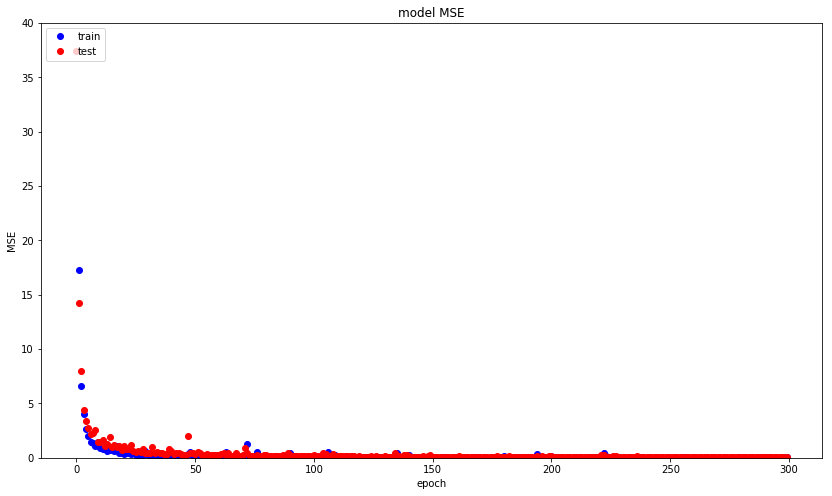

In [24]:
import matplotlib.pyplot as plt
# summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(history.history['loss'],'bo')
plt.plot(history.history['val_loss'],'ro')
plt.title('model MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.ylim(0,40)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

En este gráfico se aprecia el decaimiento mucho más claro que utilizando una función de activación Sigmoidal. Tanto errores de entrenamiento como de validacion corresponden a valores bastante pequeños y, claramente, con una menor varianza (casi nula) dado que no se da el caso de fluctuación apreciado en las celdas anteriores. Así entonces, dentro de los primeros 5 epochs el aprendizaje de la red es notable pues decae considerablemente el nivel de error, mientras que Sigmoid lo hace de manera más suave a través de los epochs.

Finalmente, se está en condiciones de aceptar a la función de activación ReLu como la adecuada; Considerando además la linealidad en el rango de valores positivos, tal como expone el problema de regresión planteado, es natural llegar a esta conclusión.



#### d)Repita b) y c) variando la tasa de aprendizaje (learning rate) en un rango sensible. Comente. Si observara divergencia durante el entrenamiento, determine si esto ocurre para cada repetición del experimento.



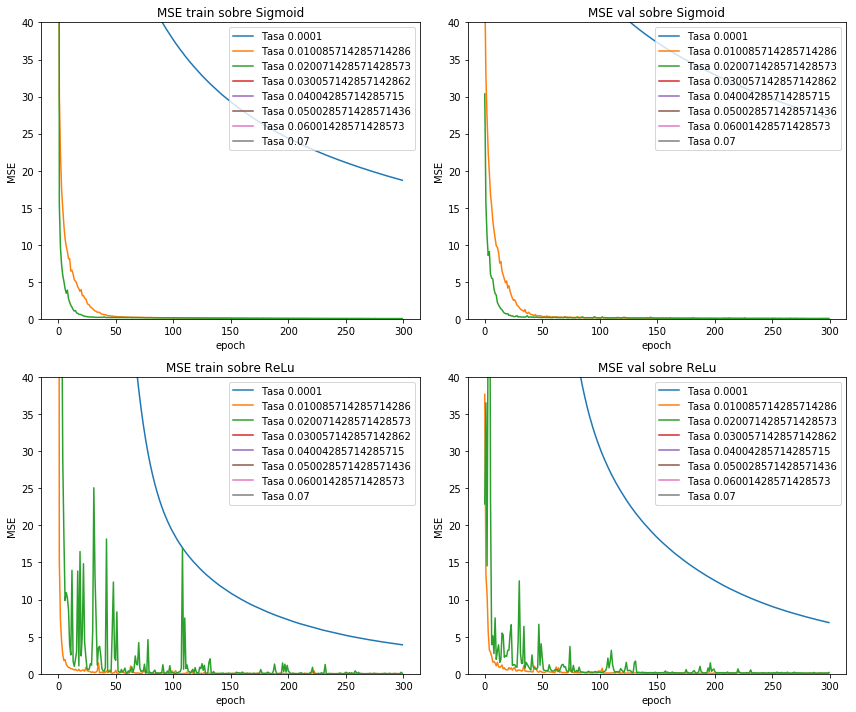

In [25]:
import numpy as np
n_lr = 8
lear_rate = np.linspace(0.0001,0.07,n_lr)
activacion=["sigmoid","relu"]
A,B=plt.subplots(2,2,figsize=(12,10))
i=0
for a in activacion:      
    for r in lear_rate:
        model = Sequential()
        model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation=a))
        model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
        model.compile(optimizer=(SGD(lr=r)),loss='mean_squared_error')
        history = model.fit(X_train_scaled, y_train, epochs=300,
                            verbose=0, validation_data=(X_test_scaled, y_test))
        
        loss = history.history['loss'].copy()
        val_loss = history.history['val_loss'].copy()
        B[i,0].plot(loss,label='Tasa '+str(r))
        B[i,1].plot(val_loss,label='Tasa '+str(r))
    i+=1

B[0,0].legend(loc='upper right')
B[0,0].set_title('MSE train sobre Sigmoid')
B[0,0].set_ylim(0,40)
B[0,0].set_ylabel('MSE')
B[0,0].set_xlabel('epoch')

B[0,1].legend(loc='upper right')
B[0,1].set_title('MSE val sobre Sigmoid')
B[0,1].set_ylim(0,40)
B[0,1].set_ylabel('MSE')
B[0,1].set_xlabel('epoch')

B[1,0].legend(loc='upper right')
B[1,0].set_title('MSE train sobre ReLu')
B[1,0].set_ylim(0,40)
B[1,0].set_ylabel('MSE')
B[1,0].set_xlabel('epoch')

B[1,1].legend(loc='upper right')
B[1,1].set_title('MSE val sobre ReLu')
B[1,1].set_ylim(0,40)
B[1,1].set_ylabel('MSE')
B[1,1].set_xlabel('epoch')

A.tight_layout()
plt.show()
        

Con el fin de trabajar en un rango de tasas de aprendizaje válidas, para efectos de los modelos a entrenar, se estableció que éstas debían pertenecer al rango 0.0001-0.07. Así entonces, se obtuvo que, para ciertas tasas de aprendizaje (aquellas de valores 'altos'), reflejaban someterse a un fenómeno de divergencia.  
Por esto, en los gráficos presentados, es apreciable la gran influencia del parámetro 'learning rate' cuando se utiliza un optimizador basado en gradientes.  
Así, cuando esta es toma valores muy bajos, el nivel de convergencia hacia un óptimo local es bastante lento dado que el reajuste de hiperparámetros se realiza con valores de actualización muy bajos. Al contrario, cuando esta tasa de aprendizaje toma valores más altos, la convergencia empieza a acelerarse. Sin embargo, si esta es muy grande, se producirá un efecto negativo en el entrenamiento de la red puesto que no se logrará llegar al óptimo dado que se caerá en una divergencia alejándose de él.  

Este efecto de divergencia se refleja en los valores infinitos que toman los errores (al estar alejándose del óptimo). Si bien estos valores no se explicitan, los gráficos sí lo hacen puesto que, aquellos valores demasiado altos se interpretan, para efectos de cálculo, como infinitos . Los cuales son imposible de representar visualmente y que, claro, se traducen a los valores NaN. Un ejemplo burdo de lo indicado es: 



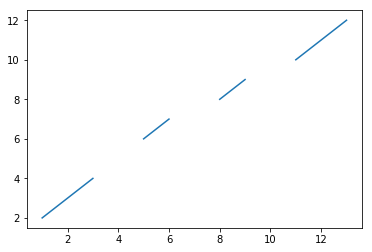

In [26]:
plt.plot([np.nan,2,3,4,np.nan, 6,7,np.inf,8,9, np.nan,10,11,12])


A continuación, de manera más clara, se presentan los casos de divergencia apreciados tanto para la función de activación Sigmoidal como ReLu. 

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 1s 2ms/step - loss: 1922.0422 - val_loss: 39.3122
Epoch 2/300
379/379 [==============================] - 0s 240us/step - loss: 17.5640 - val_loss: 16.1427
Epoch 3/300
379/379 [==============================] - 0s 297us/step - loss: 7.7741 - val_loss: 9.8064
Epoch 4/300
379/379 [==============================] - 0s 305us/step - loss: 4.9024 - val_loss: 7.4358
Epoch 5/300
379/379 [==============================] - 0s 249us/step - loss: 3.6838 - val_loss: 6.7615
Epoch 6/300
379/379 [==============================] - 0s 285us/step - loss: 3.1282 - val_loss: 5.7287
Epoch 7/300
379/379 [==============================] - 0s 276us/step - loss: 2.7449 - val_loss: 5.4975
Epoch 8/300
379/379 [==============================] - 0s 255us/step - loss: 2.5450 - val_loss: 5.0068
Epoch 9/300
379/379 [==============================] - 0s 178us/step - loss: 2.3827 - val_loss: 4.8520
Epoch 10/300
379/379 [=

379/379 [==============================] - 0s 287us/step - loss: 0.0726 - val_loss: 0.1662
Epoch 158/300
379/379 [==============================] - 0s 311us/step - loss: 0.0742 - val_loss: 0.1648
Epoch 159/300
379/379 [==============================] - 0s 398us/step - loss: 0.0708 - val_loss: 0.1574
Epoch 160/300
379/379 [==============================] - 0s 469us/step - loss: 0.0682 - val_loss: 0.1721
Epoch 161/300
379/379 [==============================] - 0s 280us/step - loss: 0.0683 - val_loss: 0.1576
Epoch 162/300
379/379 [==============================] - 0s 259us/step - loss: 0.0664 - val_loss: 0.1666
Epoch 163/300
379/379 [==============================] - 0s 259us/step - loss: 0.0708 - val_loss: 0.1539
Epoch 164/300
379/379 [==============================] - 0s 335us/step - loss: 0.0717 - val_loss: 0.1512
Epoch 165/300
379/379 [==============================] - 0s 284us/step - loss: 0.0694 - val_loss: 0.1502
Epoch 166/300
379/379 [==============================] - 0s 263us/ste

Epoch 235/300
379/379 [==============================] - 0s 256us/step - loss: 0.0390 - val_loss: 0.1168
Epoch 236/300
379/379 [==============================] - 0s 220us/step - loss: 0.0406 - val_loss: 0.1079
Epoch 237/300
379/379 [==============================] - 0s 295us/step - loss: 0.0375 - val_loss: 0.1072
Epoch 238/300
379/379 [==============================] - 0s 219us/step - loss: 0.0377 - val_loss: 0.1017
Epoch 239/300
379/379 [==============================] - 0s 262us/step - loss: 0.0372 - val_loss: 0.1067
Epoch 240/300
379/379 [==============================] - 0s 297us/step - loss: 0.0367 - val_loss: 0.1025
Epoch 241/300
379/379 [==============================] - 0s 235us/step - loss: 0.0425 - val_loss: 0.1028
Epoch 242/300
379/379 [==============================] - 0s 324us/step - loss: 0.0379 - val_loss: 0.1019
Epoch 243/300
379/379 [==============================] - 0s 161us/step - loss: 0.0364 - val_loss: 0.0992
Epoch 244/300
379/379 [==============================] 

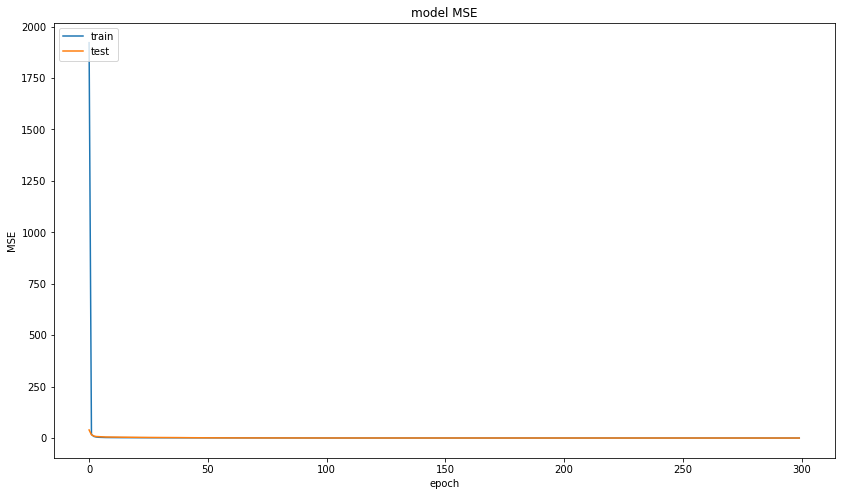

In [27]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.031),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=300,
    verbose=1, validation_data=(X_test_scaled, y_test))


plt.figure(figsize=(14,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 1s 2ms/step - loss: 349.6400 - val_loss: 249.4591
Epoch 2/300
379/379 [==============================] - 0s 292us/step - loss: 53.6255 - val_loss: 41.0748
Epoch 3/300
379/379 [==============================] - 0s 249us/step - loss: 38.0387 - val_loss: 19.8542
Epoch 4/300
379/379 [==============================] - 0s 223us/step - loss: 8.6690 - val_loss: 12.8218
Epoch 5/300
379/379 [==============================] - 0s 207us/step - loss: 17.5150 - val_loss: 6.7576
Epoch 6/300
379/379 [==============================] - 0s 233us/step - loss: 58.3310 - val_loss: 8.8122
Epoch 7/300
379/379 [==============================] - 0s 189us/step - loss: 35.3848 - val_loss: 7.1394
Epoch 8/300
379/379 [==============================] - 0s 171us/step - loss: 35.6384 - val_loss: 4.7456
Epoch 9/300
379/379 [==============================] - 0s 314us/step - loss: 6.1871 - val_loss: 5.2879
Epoch 10/300
379

379/379 [==============================] - 0s 167us/step - loss: 0.1318 - val_loss: 0.1814
Epoch 158/300
379/379 [==============================] - 0s 293us/step - loss: 0.1032 - val_loss: 0.1499
Epoch 159/300
379/379 [==============================] - 0s 231us/step - loss: 0.0240 - val_loss: 0.1393
Epoch 160/300
379/379 [==============================] - 0s 213us/step - loss: 0.0578 - val_loss: 0.1918
Epoch 161/300
379/379 [==============================] - 0s 229us/step - loss: 0.0369 - val_loss: 0.1865
Epoch 162/300
379/379 [==============================] - 0s 300us/step - loss: 0.0464 - val_loss: 0.1737
Epoch 163/300
379/379 [==============================] - 0s 282us/step - loss: 0.0658 - val_loss: 0.1683
Epoch 164/300
379/379 [==============================] - 0s 252us/step - loss: 0.4727 - val_loss: 0.2037
Epoch 165/300
379/379 [==============================] - 0s 227us/step - loss: 0.0891 - val_loss: 0.2169
Epoch 166/300
379/379 [==============================] - 0s 309us/ste

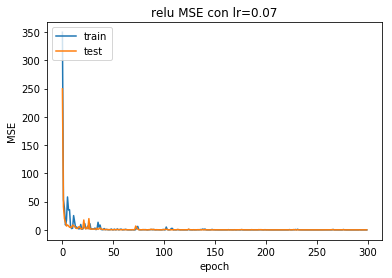

In [28]:
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=(SGD(lr=0.0229)),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=300,
                    verbose=1, validation_data=(X_test_scaled, y_test))

loss = history.history['loss'].copy()
val_loss = history.history['val_loss'].copy()
plt.figure(figsize=(6,4))
plt.plot(loss)
plt.plot(val_loss)
plt.title(a+' MSE con lr='+str(r))
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Así entonces, la red entrenada con función Sigmoidal, permite convergencia hacia un óptimo local cuando la tasa de aprendizaje no supera el 0.03. Por sobre este valor, se aprecia el fenómeno de divergencia de la red. Es decir, en lugar de acercarse y ajustar los parámetros para alcanzar un óptimo, la alta tasa de aprendizaje produce un cambio en los hiperparámetros que produce un salto que aleja al algoritmo de los óptimos traduciéndose en erorres mucho mayores que los ya alcanzados, tal como ya se comentó. Así, no se permite el reajustaste en la dirección correcta. 

A continuación se presenta el entrenamiento, y sus valores de error, para las configuraciones de función de activacion Sigmoidal y ReLU en base a diferentes tasa de aprendizaje. Tasas que han sido reajustadas a fin de no diverger

In [29]:
import numpy as np
n_lr = 8
lear_rate_sig = np.linspace(0.0001,0.03,n_lr)
activacion="sigmoid" 
loss_val=[]
for r in lear_rate_sig:
    itera=[]
    model = Sequential() 
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation=a))
    model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
    model.compile(optimizer=(SGD(lr=r)),loss='mean_squared_error')
    history = model.fit(X_train_scaled, y_train, epochs=300,
                        verbose=0, validation_data=(X_test_scaled, y_test))

    loss = history.history['loss'].copy()
    val_loss = history.history['val_loss'].copy()
    itera.append(loss)
    itera.append(val_loss)
    loss_val.append(itera)

n_lr = 8
lear_rate_relu = np.linspace(0.0001,0.025,n_lr)
activacion="relu"
loss_val2=[]
for r in lear_rate_relu:
    itera2=[]
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation=a))
    model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
    model.compile(optimizer=(SGD(lr=r)),loss='mean_squared_error')
    history = model.fit(X_train_scaled, y_train, epochs=300,
                        verbose=0, validation_data=(X_test_scaled, y_test))

    loss = history.history['loss'].copy()
    val_loss = history.history['val_loss'].copy()
    itera2.append(loss)
    itera2.append(val_loss)
    loss_val2.append(itera)


## hacer grafico  (all in one) uno para sigmoid y otro para RELU

#### e) Entrene los modelos considerados en b) y c) usando *progressive decay*. Compare y comente.



Valores de tasas de decaimiento a aplicar:  [1.00000000e-06 4.64158883e-06 2.15443469e-05 1.00000000e-04
 4.64158883e-04 2.15443469e-03 1.00000000e-02 4.64158883e-02
 2.15443469e-01 1.00000000e+00]


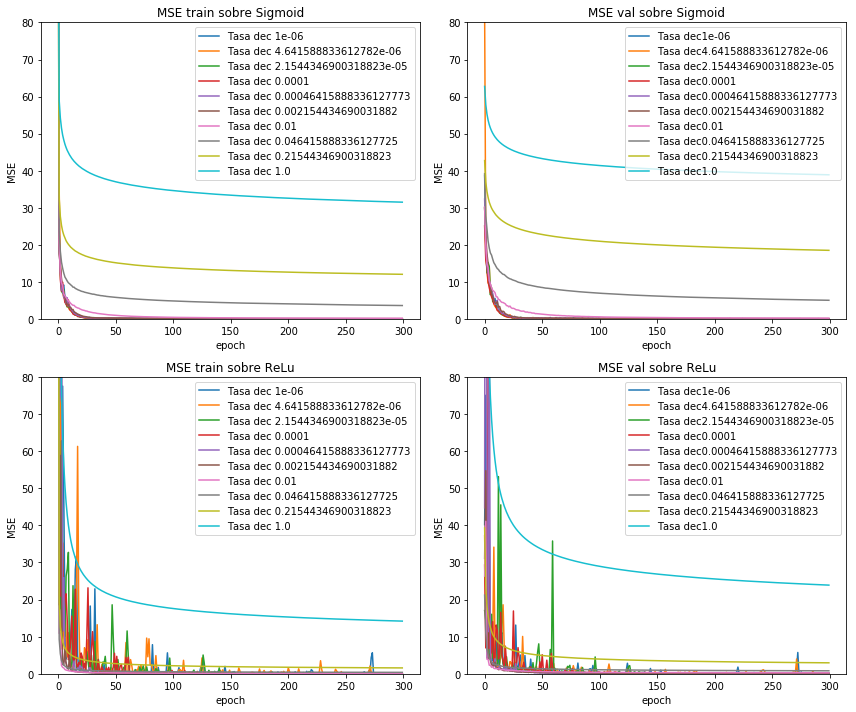

In [30]:
n_decay = 10
lear_decay = np.logspace(-6,0,n_decay)
print ("Valores de tasas de decaimiento a aplicar: ",lear_decay)
activacion=["sigmoid","relu"]
A,B=plt.subplots(2,2,figsize=(12,10))
i=0
for a in activacion:  
    for r in lear_decay:
        model = Sequential()
        model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation=a))
        model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
        #modificar la tasa del sgd learning rate
        model.compile(optimizer=(SGD(lr=0.02,decay=r)),loss='mean_squared_error')
        history = model.fit(X_train_scaled, y_train, epochs=300,
                            verbose=0, validation_data=(X_test_scaled, y_test))
        loss = history.history['loss'].copy()
        val_loss = history.history['val_loss'].copy()
        B[i,0].plot(loss,label='Tasa dec '+str(r))
        B[i,1].plot(val_loss,label='Tasa dec'+str(r))
    i+=1

B[0,0].legend(loc='upper right')
B[0,0].set_title('MSE train sobre Sigmoid')
B[0,0].set_ylim(0,80)
B[0,0].set_ylabel('MSE')
B[0,0].set_xlabel('epoch')

B[0,1].legend(loc='upper right')
B[0,1].set_title('MSE val sobre Sigmoid')
B[0,1].set_ylim(0,80)
B[0,1].set_ylabel('MSE')
B[0,1].set_xlabel('epoch')

B[1,0].legend(loc='upper right')
B[1,0].set_title('MSE train sobre ReLu')
B[1,0].set_ylim(0,80)
B[1,0].set_ylabel('MSE')
B[1,0].set_xlabel('epoch')

B[1,1].legend(loc='upper right')
B[1,1].set_title('MSE val sobre ReLu')
B[1,1].set_ylim(0,80)
B[1,1].set_ylabel('MSE')
B[1,1].set_xlabel('epoch')

A.tight_layout()
plt.show()
        
        
        

        

Con una tasa de entrenamiento fija en 0.02, se observa que la aplicación de progressive decay permite...



Este hiperparámetro afecta de manera tal que...
### decir que hace

vale decir, que el efecto de la aplicación de éste, sobre Sigmoidal como sobre RaLu, afecta del mismo modo. Es decir, valores pequeños (e-6 - e-4) el decaimiento del error es lento y suave, mientras que con valolres altos, la tendencia se ve afectada de manera tal que el error de pruebas (test) se desplaza hacia arriba, es decir, aumenta.  

# alguna ventaja de una funcion respecto a la otra?
# valores de errores en entrenamiento y validacion/test se mantienen?


A fin de conocer la configuración de parámetros que permite obtener resultados destacables, se presenta a continuación el efecto, sobre los errores de entrenamiento y validación (en base a funciones de activación Sigmoidal y ReLu), de variar la tasa de aprendizaje dentro de un rango predefinido: 


## analizar como afectan los cambios

#### f) Entrene los modelos considerados en b) y c) utilizando SGD en mini-*batches*. Experimente con diferentes tamaños del *batch*. Comente.
```python
n_batches = 21
batch_sizes = np.round(np.linspace(1,X_train_scaled.shape[0],n_batches))
model.fit(X_train_scaled.as_matrix(),y_train.as_matrix(),batch_size=50,epochs=300)
```


[ 25  50  75 100 125 150 175 200 225 250]


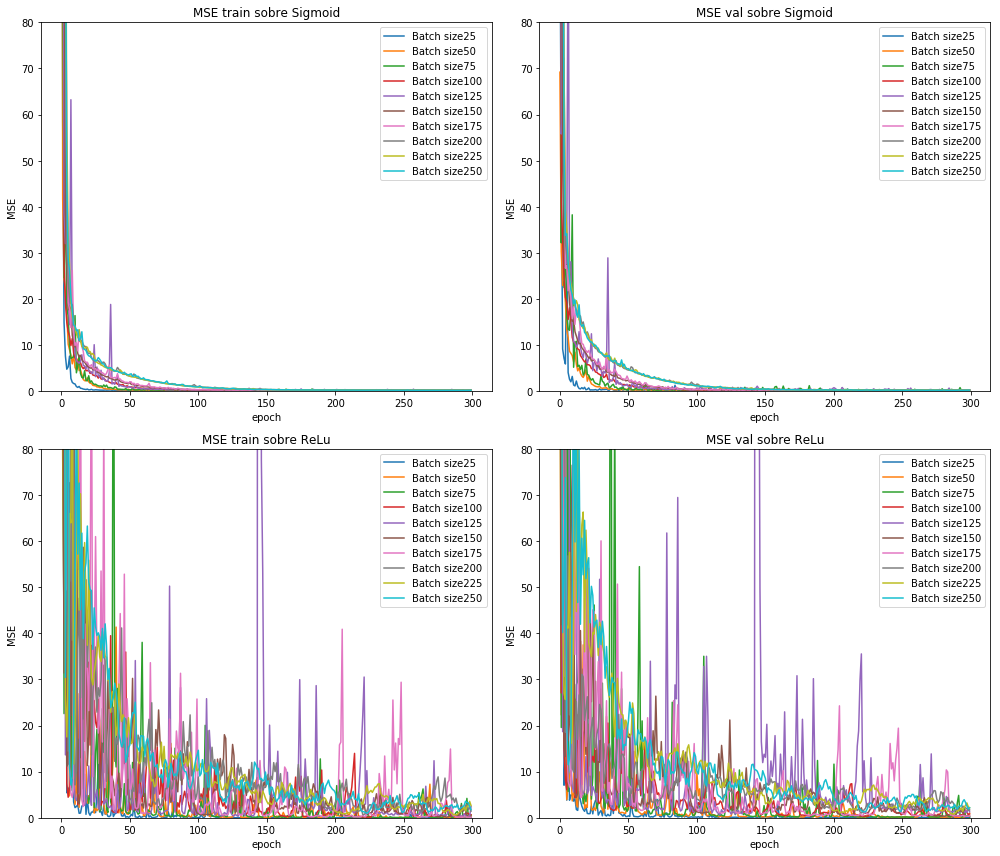

"\nplt.plot(loss)\nplt.plot(val_loss)\nplt.title(a+' MSE con batch size='+str(r))\nplt.ylabel('MSE')\nplt.xlabel('epoch')\nplt.legend(['train', 'test'], loc='upper left')\nplt.show()\n"

In [31]:
n_batches = 10
batch_sizes = np.linspace(25,250,n_batches,dtype=np.int)
print (batch_sizes)
#batch_sizes= [10,20,50,75,100,200,300]
A,B=plt.subplots(2,2,figsize=(14,12))
i=0
activacion=["sigmoid","relu"]
for a in activacion:  
    for r in batch_sizes:
        model = Sequential()
        model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation=a))
        model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
        #modificar la tasa del sgd learning rate
        model.compile(optimizer=(SGD(lr=0.02)),loss='mean_squared_error')
        history = model.fit(X_train_scaled, y_train, epochs=300,verbose=0, batch_size=r,validation_data=(X_test_scaled, y_test))
        loss = history.history['loss'].copy()
        val_loss = history.history['val_loss'].copy()
        B[i,0].plot(loss,label='Batch size'+str(r))
        B[i,1].plot(val_loss,label='Batch size'+str(r))
    i+=1

B[0,0].legend(loc='upper right')
B[0,0].set_title('MSE train sobre Sigmoid')
B[0,0].set_ylim(0,80)
B[0,0].set_ylabel('MSE')
B[0,0].set_xlabel('epoch')

B[0,1].legend(loc='upper right')
B[0,1].set_title('MSE val sobre Sigmoid')
B[0,1].set_ylim(0,80)
B[0,1].set_ylabel('MSE')
B[0,1].set_xlabel('epoch')

B[1,0].legend(loc='upper right')
B[1,0].set_title('MSE train sobre ReLu')
B[1,0].set_ylim(0,80)
B[1,0].set_ylabel('MSE')
B[1,0].set_xlabel('epoch')

B[1,1].legend(loc='upper right')
B[1,1].set_title('MSE val sobre ReLu')
B[1,1].set_ylim(0,80)
B[1,1].set_ylabel('MSE')
B[1,1].set_xlabel('epoch')

A.tight_layout()
plt.show()
        

'''
plt.plot(loss)
plt.plot(val_loss)
plt.title(a+' MSE con batch size='+str(r))
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
'''
        
        



## analizar y comentar

#### g) Entrene los modelos obtenidos en b) y c) utilizando estrategias modernas para adaptar la tasa de aprendizaje. Compare los desempeños de adagrad, adadelta, RMSprop y adam. ¿Se observa en algún caso un mejor resultado final? ¿Se observa en algún caso una mayor velocidad de convergencia sobre el dataset de entrenamiento? ¿Sobre el dataset de pruebas?
```python
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta
moptimizer = Adagrad(lr=0.01)
model.compile(optimizer=moptimizer)
model.fit(X_train_scaled.as_matrix(),y_train.as_matrix())
```


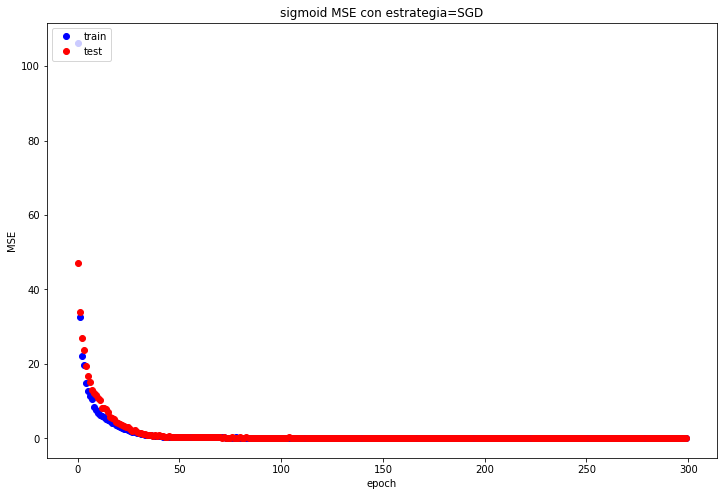

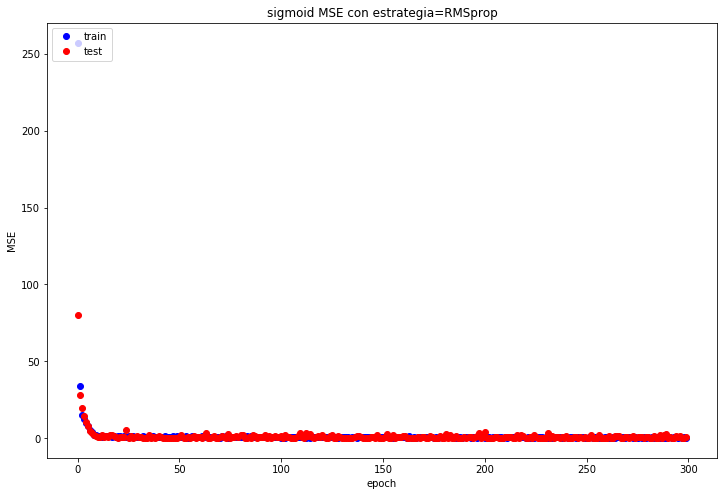

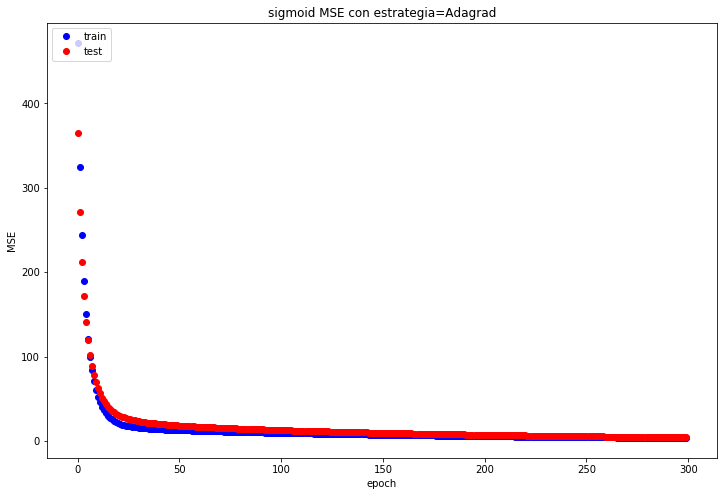

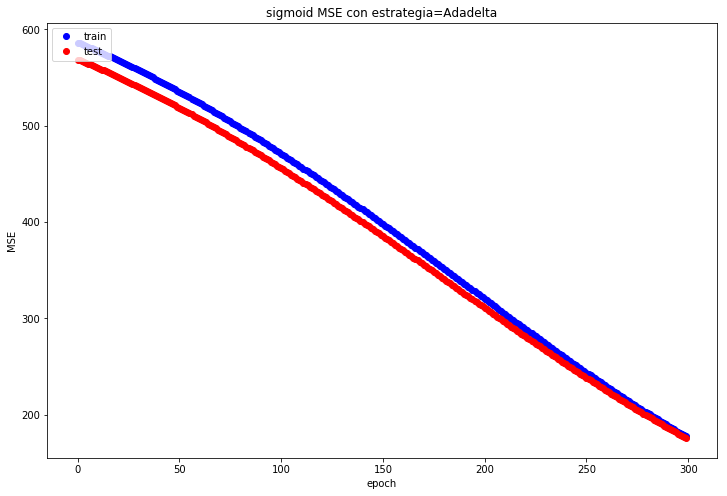

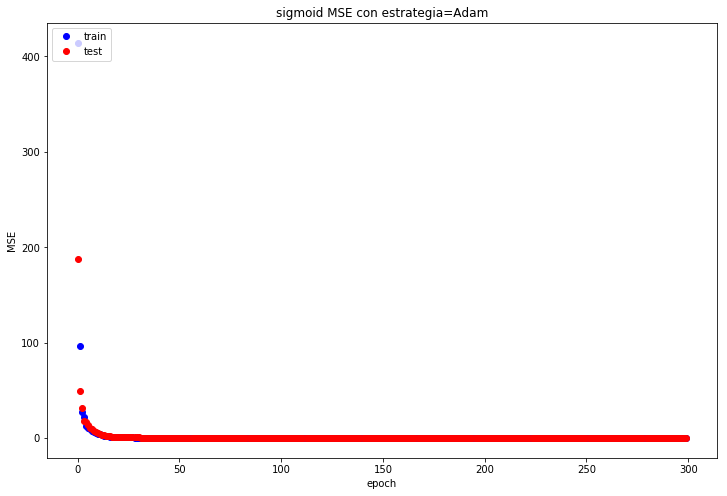

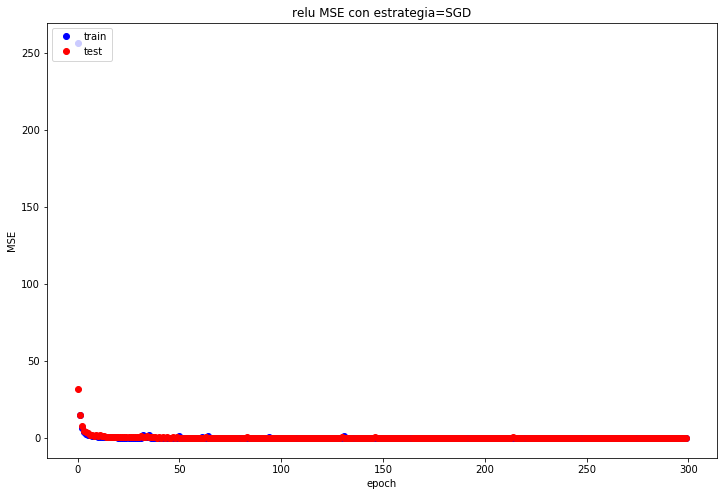

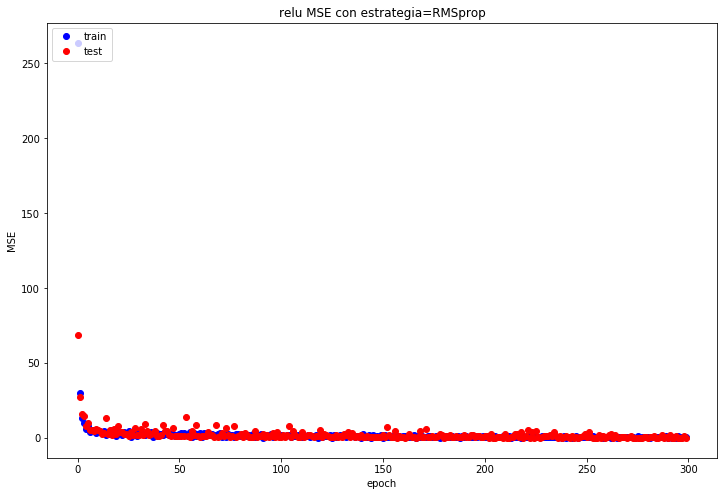

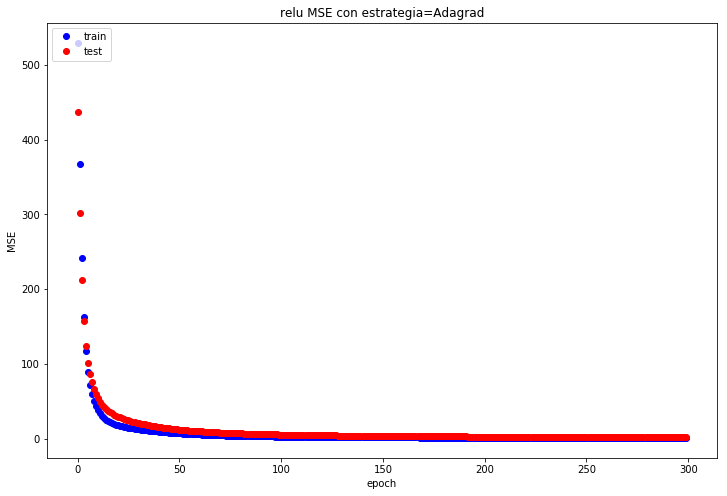

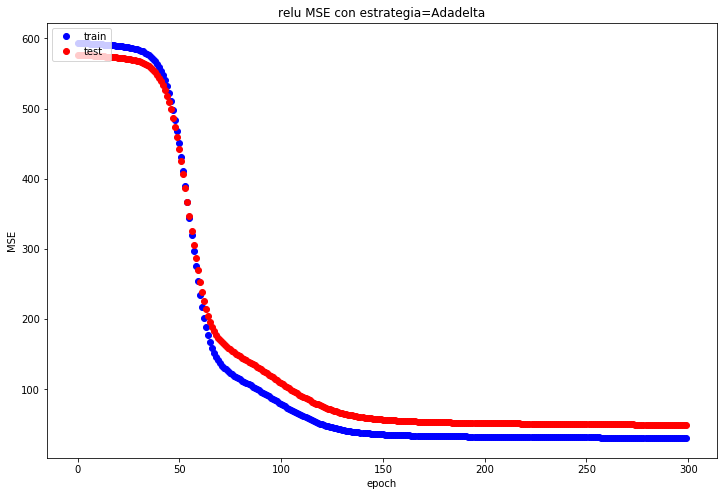

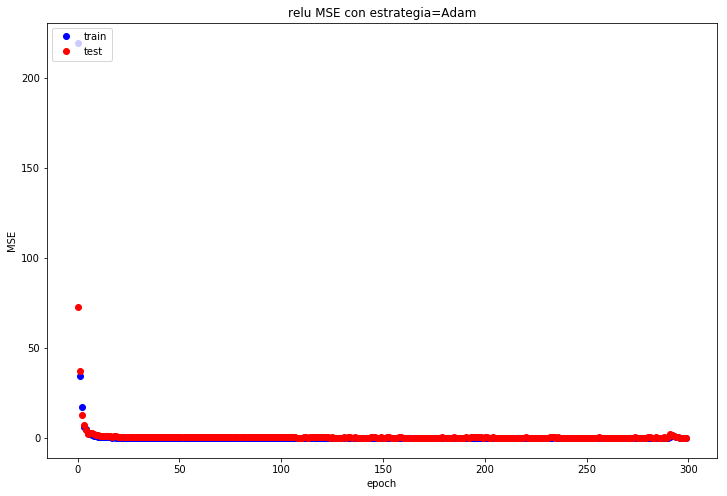

In [32]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta

estrategias={}
estrategias['SGD']=SGD(lr=0.01)
estrategias['Adam']=Adam(lr=0.01)
estrategias['RMSprop']=RMSprop(lr=0.01)
estrategias['Adagrad']=Adagrad(lr=0.01)
estrategias['Adadelta']=Adadelta(lr=0.01)
activacion=["sigmoid","relu"]

for a in activacion:  
    for estrat in estrategias.keys():
        plt.figure(figsize=(12,8))
        model = Sequential()
        model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation=a))
        model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
        model.compile(optimizer=(estrategias[estrat]),loss='mean_squared_error')
        history = model.fit(X_train_scaled, y_train, epochs=300,
                            verbose=0, validation_data=(X_test_scaled, y_test))
        loss = history.history['loss'].copy()
        val_loss = history.history['val_loss'].copy()
        plt.plot(loss,'bo')
        plt.plot(val_loss,'ro')
        plt.title(a+' MSE con estrategia='+str(estrat))
        plt.ylabel('MSE')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()



## comentar qué se observa! 


#### h) Entrene los modelos obtenidos en b) y c) utilizando regularizadores $l_1$ y $l_2$ (*weight decay*). Compare los desempeños de prueba obtenidos antes y después de regularizar. Experimente con distintos valores del parámetro de regularización y comente. Además evalúe el efecto de regularizar solo la primera capa *vs* la segunda, comente.
```python
model = Sequential()
#la regularization se debe incorporar a cada capa separadamente
idim=X_train_scaled.shape[1]
model.add(Dense(200,input_dim=idim,kernel_initializer='uniform',W_regularizer=l2(0.01)))
model.add(Activation('sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',W_regularizer=l2(0.01)))
model.add(Activation('linear'))
```


#### Sigmoidal y ReLU original

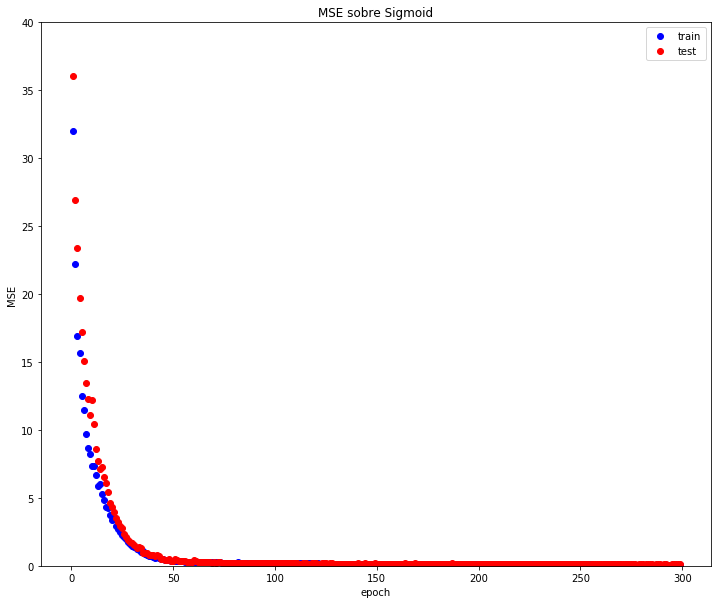

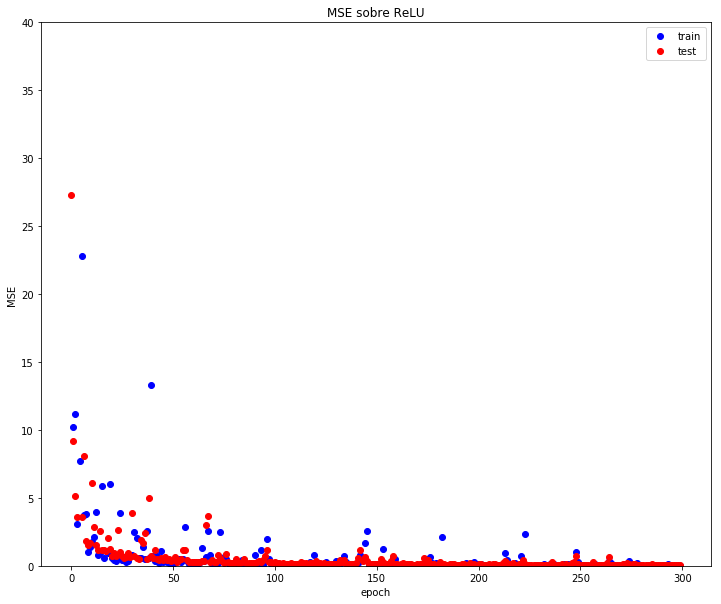

In [33]:
model_orig = Sequential()
model_orig.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model_orig.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model_orig.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
history = model_orig.fit(X_train_scaled, y_train, epochs=300,
    verbose=0, validation_data=(X_test_scaled, y_test))
plt.figure(figsize=(12,10))
plt.plot(history.history['loss'], 'bo')
plt.plot(history.history['val_loss'],'ro')
plt.title('MSE sobre Sigmoid')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.ylim(0,40)
plt.legend(['train', 'test'], loc='upper right')
plt.show()

model_orig = Sequential()
model_orig.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model_orig.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model_orig.compile(optimizer=SGD(lr=0.015),loss='mean_squared_error')
history = model_orig.fit(X_train_scaled, y_train, epochs=300,
    verbose=0, validation_data=(X_test_scaled, y_test))
plt.figure(figsize=(12,10))
plt.plot(history.history['loss'], 'bo')
plt.plot(history.history['val_loss'],'ro')
plt.title('MSE sobre ReLU')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.ylim(0,40)
plt.legend(['train', 'test'], loc='upper right')
plt.show()

### Regularizando ambas capas

#### Sigmoidal y ReLU con regularizador L_1

/home/casapanshop/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_regularizer=<keras.reg..., activation="sigmoid", input_dim=15, kernel_initializer="uniform")`
  if sys.path[0] == '':
/home/casapanshop/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_regularizer=<keras.reg..., activation="linear", kernel_initializer="uniform")`
  
/home/casapanshop/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_regularizer=<keras.reg..., activation="relu", input_dim=15, kernel_initializer="uniform")`
  if sys.path[0] == '':


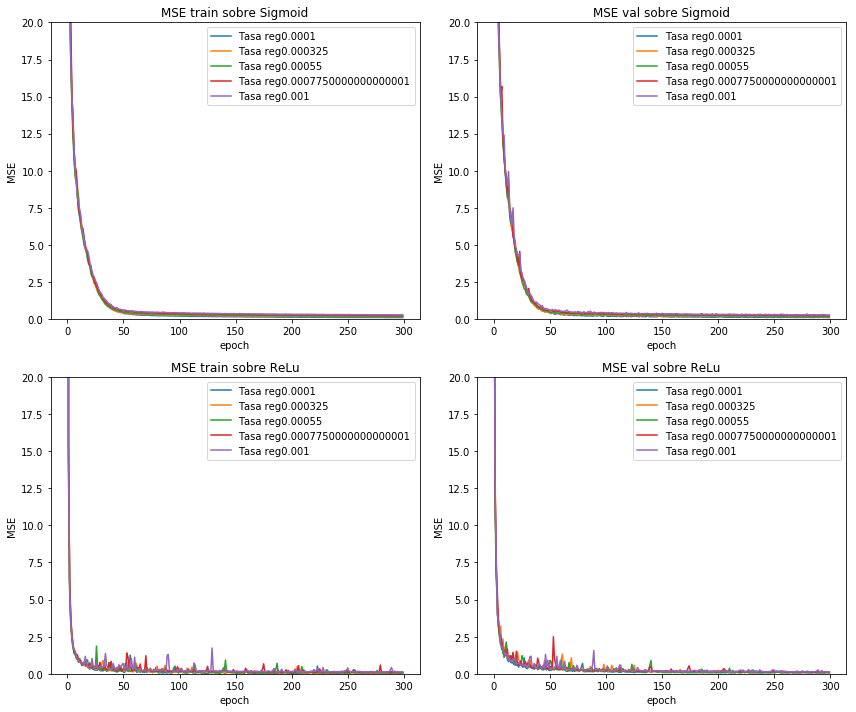

In [34]:
from keras.regularizers import *
n_lr = 5
reguls = np.linspace(0.0001,0.001,n_lr)
activacion=["sigmoid","relu"]
A,B=plt.subplots(2,2,figsize=(12,10))
i=0

for a in activacion:  
    for r in reguls:
        model = Sequential()
        model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',
                        W_regularizer=l1(r),activation=a))
        model.add(Dense(1, kernel_initializer='uniform',activation="linear", 
                        W_regularizer=l1(r))) 
        model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error') #0.012
        history = model.fit(X_train_scaled, y_train, epochs=300,verbose=0, validation_data=(X_test_scaled, y_test))
        loss = history.history['loss'].copy()
        val_loss = history.history['val_loss'].copy()
        B[i,0].plot(loss,label='Tasa reg'+str(r))
        B[i,1].plot(val_loss,label='Tasa reg'+str(r))
    i+=1

B[0,0].legend(loc='upper right')
B[0,0].set_title('MSE train sobre Sigmoid')
B[0,0].set_ylim(0,20)
B[0,0].set_ylabel('MSE')
B[0,0].set_xlabel('epoch')

B[0,1].legend(loc='upper right')
B[0,1].set_title('MSE val sobre Sigmoid')
B[0,1].set_ylim(0,20)
B[0,1].set_ylabel('MSE')
B[0,1].set_xlabel('epoch')

B[1,0].legend(loc='upper right')
B[1,0].set_title('MSE train sobre ReLu')
B[1,0].set_ylim(0,20)
B[1,0].set_ylabel('MSE')
B[1,0].set_xlabel('epoch')

B[1,1].legend(loc='upper right')
B[1,1].set_title('MSE val sobre ReLu')
B[1,1].set_ylim(0,20)
B[1,1].set_ylabel('MSE')
B[1,1].set_xlabel('epoch')

A.tight_layout()
plt.show()

#### Sigmoidal y ReLU con regularizador L_2

/home/casapanshop/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_regularizer=<keras.reg..., activation="sigmoid", input_dim=15, kernel_initializer="uniform")`
  if sys.path[0] == '':
/home/casapanshop/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_regularizer=<keras.reg..., activation="linear", kernel_initializer="uniform")`
  
/home/casapanshop/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_regularizer=<keras.reg..., activation="relu", input_dim=15, kernel_initializer="uniform")`
  if sys.path[0] == '':


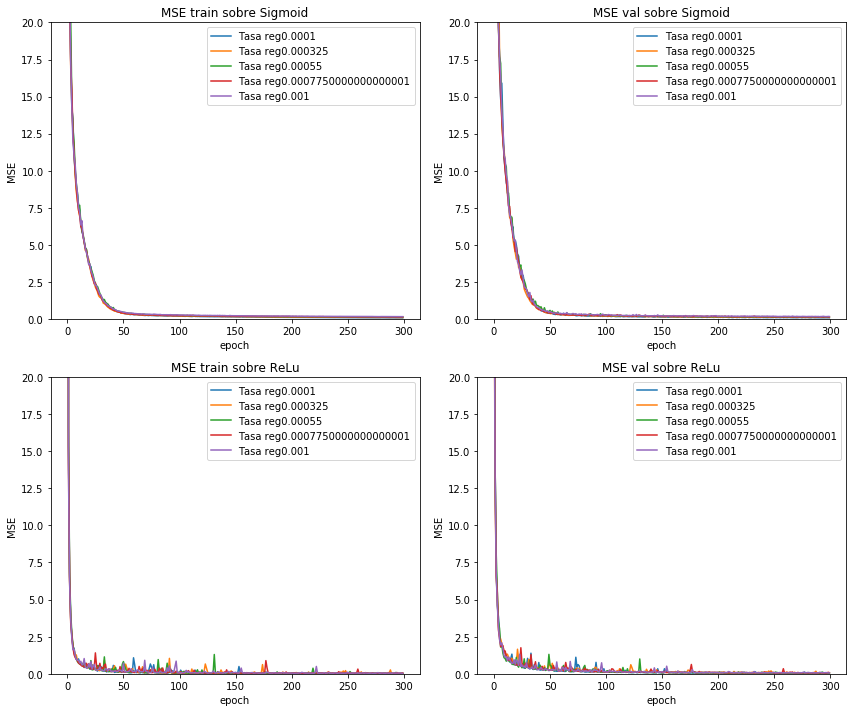

In [35]:
from keras.regularizers import *
n_lr = 5
reguls = np.linspace(0.0001,0.001,n_lr)
activacion=["sigmoid","relu"]
A,B=plt.subplots(2,2,figsize=(12,10))
i=0

for a in activacion:  
    for r in reguls:
        model = Sequential()
        model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',
                        W_regularizer=l2(r),activation=a))
        model.add(Dense(1, kernel_initializer='uniform',activation="linear", 
                        W_regularizer=l2(r))) 
        model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error') #0.012
        history = model.fit(X_train_scaled, y_train, epochs=300,verbose=0, validation_data=(X_test_scaled, y_test))
        loss = history.history['loss'].copy()
        val_loss = history.history['val_loss'].copy()
        B[i,0].plot(loss,label='Tasa reg'+str(r))
        B[i,1].plot(val_loss,label='Tasa reg'+str(r))
    i+=1

B[0,0].legend(loc='upper right')
B[0,0].set_title('MSE train sobre Sigmoid')
B[0,0].set_ylim(0,20)
B[0,0].set_ylabel('MSE')
B[0,0].set_xlabel('epoch')

B[0,1].legend(loc='upper right')
B[0,1].set_title('MSE val sobre Sigmoid')
B[0,1].set_ylim(0,20)
B[0,1].set_ylabel('MSE')
B[0,1].set_xlabel('epoch')

B[1,0].legend(loc='upper right')
B[1,0].set_title('MSE train sobre ReLu')
B[1,0].set_ylim(0,20)
B[1,0].set_ylabel('MSE')
B[1,0].set_xlabel('epoch')

B[1,1].legend(loc='upper right')
B[1,1].set_title('MSE val sobre ReLu')
B[1,1].set_ylim(0,20)
B[1,1].set_ylabel('MSE')
B[1,1].set_xlabel('epoch')

A.tight_layout()
plt.show()

#### Regularizando sólo capa 1 con  L_1

/home/casapanshop/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_regularizer=<keras.reg..., activation="sigmoid", input_dim=15, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
/home/casapanshop/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_regularizer=<keras.reg..., activation="relu", input_dim=15, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


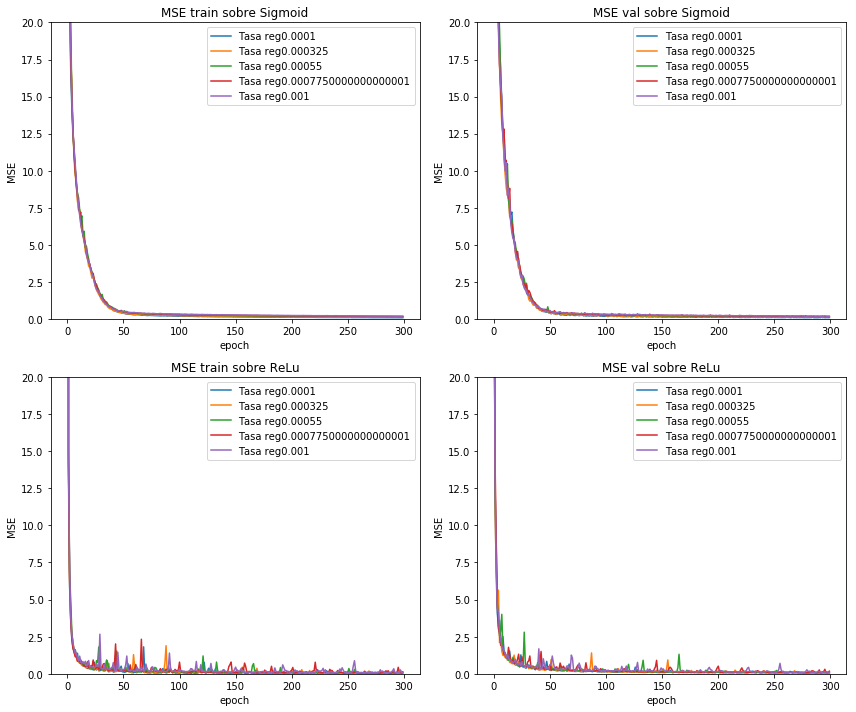

In [36]:
n_lr = 5
reguls = np.linspace(0.0001,0.001,n_lr)
activacion=["sigmoid","relu"]
A,B=plt.subplots(2,2,figsize=(12,10))
i=0

for a in activacion:  
    for r in reguls:
        model = Sequential()
        model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',
                        W_regularizer=l1(r),activation=a))
        model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
        model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error') #0.012
        history = model.fit(X_train_scaled, y_train, epochs=300,verbose=0, validation_data=(X_test_scaled, y_test))
        loss = history.history['loss'].copy()
        val_loss = history.history['val_loss'].copy()
        B[i,0].plot(loss,label='Tasa reg'+str(r))
        B[i,1].plot(val_loss,label='Tasa reg'+str(r))
    i+=1

B[0,0].legend(loc='upper right')
B[0,0].set_title('MSE train sobre Sigmoid')
B[0,0].set_ylim(0,20)
B[0,0].set_ylabel('MSE')
B[0,0].set_xlabel('epoch')

B[0,1].legend(loc='upper right')
B[0,1].set_title('MSE val sobre Sigmoid')
B[0,1].set_ylim(0,20)
B[0,1].set_ylabel('MSE')
B[0,1].set_xlabel('epoch')

B[1,0].legend(loc='upper right')
B[1,0].set_title('MSE train sobre ReLu')
B[1,0].set_ylim(0,20)
B[1,0].set_ylabel('MSE')
B[1,0].set_xlabel('epoch')

B[1,1].legend(loc='upper right')
B[1,1].set_title('MSE val sobre ReLu')
B[1,1].set_ylim(0,20)
B[1,1].set_ylabel('MSE')
B[1,1].set_xlabel('epoch')

A.tight_layout()
plt.show()

#### Regularizando sólo capa 2 (L_1) 

/home/casapanshop/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_regularizer=<keras.reg..., activation="linear", kernel_initializer="uniform")`
  if sys.path[0] == '':


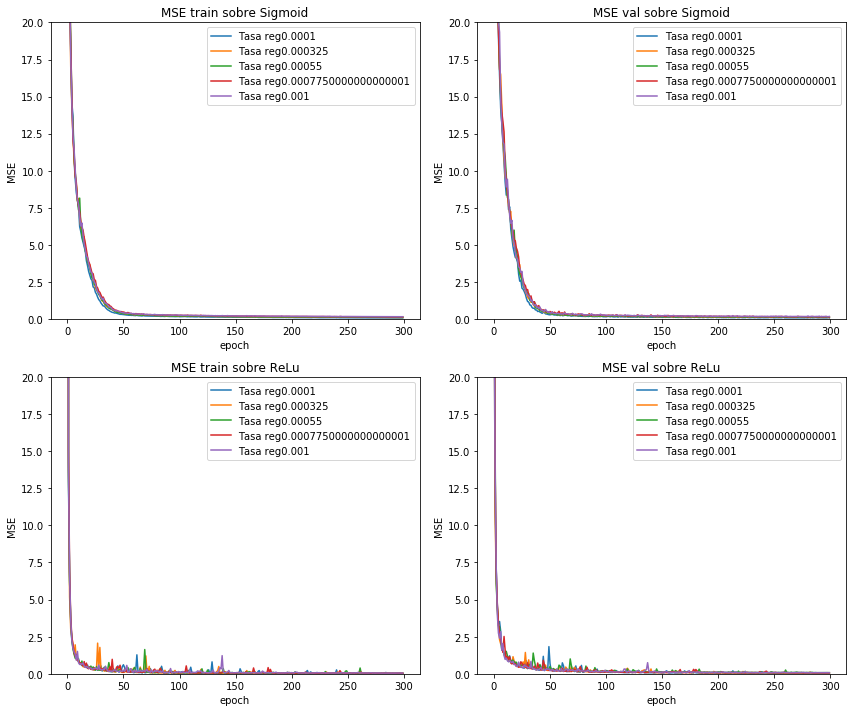

In [37]:
n_lr = 5
reguls = np.linspace(0.0001,0.001,n_lr)
activacion=["sigmoid","relu"]
A,B=plt.subplots(2,2,figsize=(12,10))
i=0

for a in activacion:  
    for r in reguls:
        model = Sequential()
        model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation=a))
        model.add(Dense(1, kernel_initializer='uniform',activation="linear", 
                        W_regularizer=l1(r))) 
        model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error') #0.012
        history = model.fit(X_train_scaled, y_train, epochs=300,verbose=0, validation_data=(X_test_scaled, y_test))
        loss = history.history['loss'].copy()
        val_loss = history.history['val_loss'].copy()
        B[i,0].plot(loss,label='Tasa reg'+str(r))
        B[i,1].plot(val_loss,label='Tasa reg'+str(r))
    i+=1

B[0,0].legend(loc='upper right')
B[0,0].set_title('MSE train sobre Sigmoid')
B[0,0].set_ylim(0,20)
B[0,0].set_ylabel('MSE')
B[0,0].set_xlabel('epoch')

B[0,1].legend(loc='upper right')
B[0,1].set_title('MSE val sobre Sigmoid')
B[0,1].set_ylim(0,20)
B[0,1].set_ylabel('MSE')
B[0,1].set_xlabel('epoch')

B[1,0].legend(loc='upper right')
B[1,0].set_title('MSE train sobre ReLu')
B[1,0].set_ylim(0,20)
B[1,0].set_ylabel('MSE')
B[1,0].set_xlabel('epoch')

B[1,1].legend(loc='upper right')
B[1,1].set_title('MSE val sobre ReLu')
B[1,1].set_ylim(0,20)
B[1,1].set_ylabel('MSE')
B[1,1].set_xlabel('epoch')

A.tight_layout()
plt.show()

#### Regularizando sólo capa 1 con L_2


/home/casapanshop/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_regularizer=<keras.reg..., activation="sigmoid", input_dim=15, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
/home/casapanshop/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_regularizer=<keras.reg..., activation="relu", input_dim=15, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


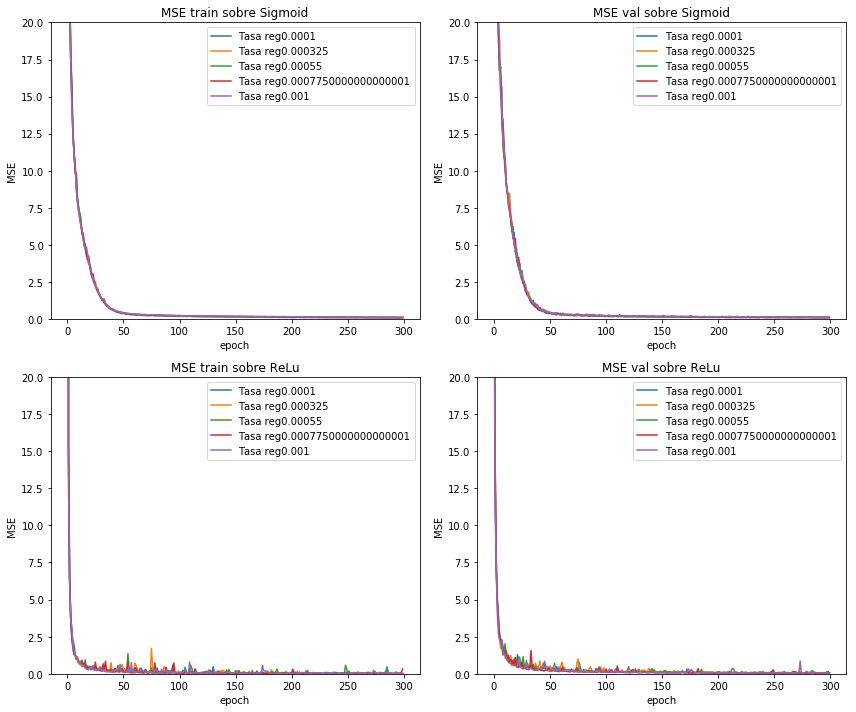

In [38]:
n_lr = 5
reguls = np.linspace(0.0001,0.001,n_lr)
activacion=["sigmoid","relu"]
A,B=plt.subplots(2,2,figsize=(12,10))
i=0

for a in activacion:  
    for r in reguls:
        model = Sequential()
        model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',
                        W_regularizer=l2(r),activation=a))
        model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
        model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error') #0.012
        history = model.fit(X_train_scaled, y_train, epochs=300,verbose=0, validation_data=(X_test_scaled, y_test))
        loss = history.history['loss'].copy()
        val_loss = history.history['val_loss'].copy()
        B[i,0].plot(loss,label='Tasa reg'+str(r))
        B[i,1].plot(val_loss,label='Tasa reg'+str(r))
    i+=1

B[0,0].legend(loc='upper right')
B[0,0].set_title('MSE train sobre Sigmoid')
B[0,0].set_ylim(0,20)
B[0,0].set_ylabel('MSE')
B[0,0].set_xlabel('epoch')

B[0,1].legend(loc='upper right')
B[0,1].set_title('MSE val sobre Sigmoid')
B[0,1].set_ylim(0,20)
B[0,1].set_ylabel('MSE')
B[0,1].set_xlabel('epoch')

B[1,0].legend(loc='upper right')
B[1,0].set_title('MSE train sobre ReLu')
B[1,0].set_ylim(0,20)
B[1,0].set_ylabel('MSE')
B[1,0].set_xlabel('epoch')

B[1,1].legend(loc='upper right')
B[1,1].set_title('MSE val sobre ReLu')
B[1,1].set_ylim(0,20)
B[1,1].set_ylabel('MSE')
B[1,1].set_xlabel('epoch')

A.tight_layout()
plt.show()

#### Regularizando sólo capa 2 con L_2

/home/casapanshop/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_regularizer=<keras.reg..., activation="linear", kernel_initializer="uniform")`
  if sys.path[0] == '':


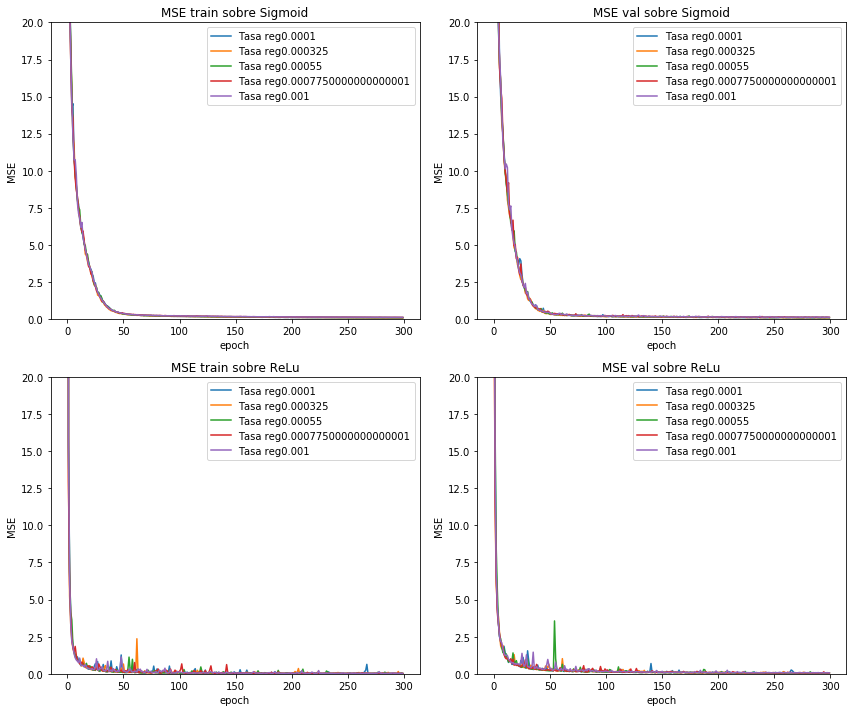

In [39]:
n_lr = 5
reguls = np.linspace(0.0001,0.001,n_lr)
activacion=["sigmoid","relu"]
A,B=plt.subplots(2,2,figsize=(12,10))
i=0

for a in activacion:  
    for r in reguls:
        model = Sequential()
        model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation=a))
        model.add(Dense(1, kernel_initializer='uniform',activation="linear", 
                        W_regularizer=l2(r))) 
        model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error') #0.012
        history = model.fit(X_train_scaled, y_train, epochs=300,verbose=0, validation_data=(X_test_scaled, y_test))
        loss = history.history['loss'].copy()
        val_loss = history.history['val_loss'].copy()
        B[i,0].plot(loss,label='Tasa reg'+str(r))
        B[i,1].plot(val_loss,label='Tasa reg'+str(r))
    i+=1

B[0,0].legend(loc='upper right')
B[0,0].set_title('MSE train sobre Sigmoid')
B[0,0].set_ylim(0,20)
B[0,0].set_ylabel('MSE')
B[0,0].set_xlabel('epoch')

B[0,1].legend(loc='upper right')
B[0,1].set_title('MSE val sobre Sigmoid')
B[0,1].set_ylim(0,20)
B[0,1].set_ylabel('MSE')
B[0,1].set_xlabel('epoch')

B[1,0].legend(loc='upper right')
B[1,0].set_title('MSE train sobre ReLu')
B[1,0].set_ylim(0,20)
B[1,0].set_ylabel('MSE')
B[1,0].set_xlabel('epoch')

B[1,1].legend(loc='upper right')
B[1,1].set_title('MSE val sobre ReLu')
B[1,1].set_ylim(0,20)
B[1,1].set_ylabel('MSE')
B[1,1].set_xlabel('epoch')

A.tight_layout()
plt.show()

## ANALIZAR POR MILES D:

#### i) Entrene los modelos obtenidos en b) y c) utilizando *Dropout*. Compare los desempeños de prueba obtenidos antes y después de regularizar. Experimente con distintos valores del parámetro de regularización y comente.
```python
from keras.layers import Dropout
model = Sequential()
...
model.add(Dropout(0.2))
...
```


### Desempeño sin Dropout

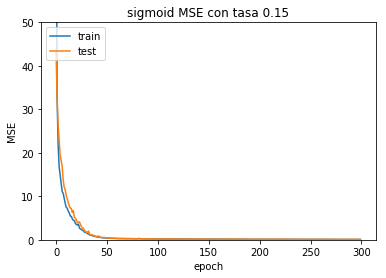

In [ ]:
activacion=["sigmoid","relu"]
for a in activacion:    
        model = Sequential()
        model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation=a))
        model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
        model.compile(optimizer=(SGD(lr=0.01)),loss='mean_squared_error')
        history = model.fit(X_train_scaled, y_train, epochs=300,
                            verbose=0, validation_data=(X_test_scaled, y_test))        
        loss = history.history['loss'].copy()
        val_loss = history.history['val_loss'].copy()
        plt.plot(loss)
        plt.plot(val_loss)
        plt.title(a+' MSE con tasa 0.15')
        plt.ylabel('MSE')
        plt.ylim(0,50)
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()

### Desempeño con Dropout

In [ ]:
from keras.layers import Dropout
drops=[0.00001,0.0001,0.001,0.01,0.1,0.5]
activacion=["sigmoid","relu"]
A,B=plt.subplots(2,2,figsize=(20,15))
i=0
for a in activacion:  
    for r in drops:
        model = Sequential()
        model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation=a))
        model.add(Dropout(r))
        model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
        model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error') 
        history = model.fit(X_train_scaled, y_train, epochs=300,verbose=0, validation_data=(X_test_scaled, y_test))
        loss = history.history['loss'].copy()
        val_loss = history.history['val_loss'].copy()
        B[i,0].plot(loss,label='Tasa drop'+str(r))
        B[i,1].plot(val_loss,label='Tasa drop'+str(r))
    i+=1

B[0,0].legend(loc='upper right')
B[0,0].set_title('MSE train sobre Sigmoid')
B[0,0].set_ylim(0,10)
B[0,0].set_ylabel('MSE')
B[0,0].set_xlabel('epoch')

B[0,1].legend(loc='upper right')
B[0,1].set_title('MSE val sobre Sigmoid')
B[0,1].set_ylim(0,10)
B[0,1].set_ylabel('MSE')
B[0,1].set_xlabel('epoch')

B[1,0].legend(loc='upper right')
B[1,0].set_title('MSE train sobre ReLu')
B[1,0].set_ylim(0,10)
B[1,0].set_ylabel('MSE')
B[1,0].set_xlabel('epoch')

B[1,1].legend(loc='upper right')
B[1,1].set_title('MSE val sobre ReLu')
B[1,1].set_ylim(0,10)
B[1,1].set_ylabel('MSE')
B[1,1].set_xlabel('epoch')

A.tight_layout()
plt.show()

## Analizar más y morir en ello

#### j) Fijando todos los demás hiper-parámetros del modelo definido en b) y en c), utilice validación cruzada con un número de *folds* igual a *K* = 5 y *K*=10 para determinar el mejor valor correspondiente a un parámetro que usted elija (tasa de aprendizaje, número de neuronas, parámetro de regularización, etc) ¿El mejor parámetro para la red con sigmoidal es distinto que para ReLU? ¿Porqué sucede? Además mida el error real del modelo sobre el conjunto de pruebas, compare y concluya.
```python
from sklearn import cross_validation
Xm = X_train_scaled.as_matrix()
ym = y_train_scaled.as_matrix()
kfold = cross_validation.KFold(len(Xm), 10)
cvscores = []
for i, (train, val) in enumerate(kfold):
    # create model
    model = #model with hiperparam
    # Compile model
    model.compile(optimizer=,loss='mean_squared_error')
    # Fit the model
    model.fit(Xm[train], ym[train], epochs=300)
    # evaluate the model
    scores = model.evaluate(Xm[val], ym[val])
    cvscores.append(scores)
mse_cv = np.mean(cvscores)
```

In [ ]:
from sklearn import cross_validation
Xm = X_train_scaled.copy()
ym = y_train.copy()
activacion=["sigmoid","relu"]
#Ks=[5,10]
lear_rate_sig = np.linspace(0.0001,0.03,n_lr)


In [ ]:

for r in lear_rate_sig:
    for a in activacion: #sigmoidal y relu        
        kfold = cross_validation.KFold(len(Xm), 5)
        cvscores = []
        for i, (train, val) in enumerate(kfold):
            model = Sequential()
            model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation=a))
            model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
            model.compile(optimizer=SGD(lr=r),loss='mean_squared_error')
            
            model.fit(Xm.values[train], ym[train], epochs=300,verbose=0)
            # evaluate the model
            scores = model.evaluate(Xm.values[val], ym[val])
            cvscores.append(scores)
        mse_cv = np.mean(cvscores)
        print ("Loss promedio de Cross Validation bajo learning rate",r,":",mse_cv)

In [ ]:
for r in lear_rate_sig:
    for a in activacion: #sigmoidal y relu        
        kfold = cross_validation.KFold(len(Xm), 10)
        cvscores = []
        for i, (train, val) in enumerate(kfold):
            model = Sequential()
            model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation=a))
            model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
            model.compile(optimizer=SGD(lr=r),loss='mean_squared_error')
            
            model.fit(Xm.values[train], ym[train], epochs=300,verbose=0)
            # evaluate the model
            scores = model.evaluate(Xm.values[val], ym[val])
            cvscores.append(scores)
        mse_cv = np.mean(cvscores)
        print ("Loss promedio de Cross Validation bajo learning rate",r,":",mse_cv)